# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.00000000e+00   5.87785252e-01   9.51056516e-01   9.51056516e-01
   5.87785252e-0

/home/masters/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


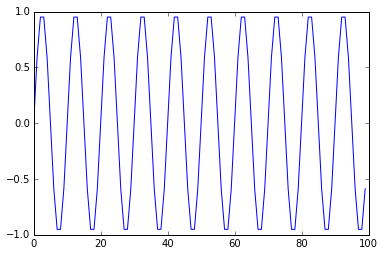

In [3]:
start = 0
fin = 10
step = 0.1

N = (fin-start)/(step)

M = np.zeros(N)

xdata = np.arange(start,fin,step)

print xdata
print M

j=0
for i in xdata: 
    M[j]=np.sin(2*np.pi*i)
    j=j+1
      
print M
print xdata

plt.plot(M)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

In [4]:
start = 0
fin = 10
step = 0.2

N = (fin-start)/(freq)

M = np.zeros(N)

xdata = np.arange(start,fin,step)
 
s=np.sin(2*np.pi*step*xdata)
      
plt.stem(s)

NameError: name 'freq' is not defined

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.   0.   0.   0.5  1.   1.   1.   1.   0.5  0. ]


<Container object of 3 artists>

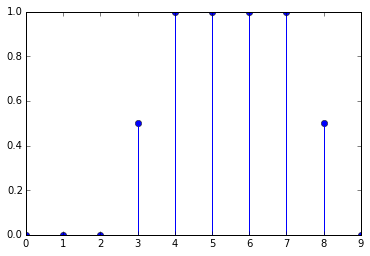

In [17]:
def step(n, N):
    myStep = np.zeros(N)
    if(n >= 0 & n < N):
        myStep[n:N-1] = 1
    
    else:
        print('ERROR : n out of range')
    
    return myStep
        
N=10

xk=step(4,N)

print xk

M = np.zeros(N)

for i in np.arange(0,N-1):
    M[i]=(xk[i]+xk[i+1])/2
    
print M

plt.stem(M)

**1.2** Propose a modification to obtain a causal version

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.   0.   0.   0.   0.5  1.   1.   1.   1.   0. ]


<Container object of 3 artists>

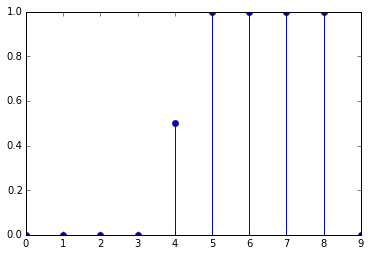

In [18]:
N=10

xk=step(4,N)

print xk

M = np.zeros(N)

for i in np.arange(0,N-1):
    M[i]=(xk[i-1]+xk[i])/2
    
print M

plt.stem(M)

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [85]:
def prim (f, N):

    M = np.zeros(N)   
    s = 0
   
    for i in np.arange(0,N):
        for j in np.arange(0,i):
            M[i]=M[i]+f[j]
    return M

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  2.  3.  4.  5.]


<Container object of 3 artists>

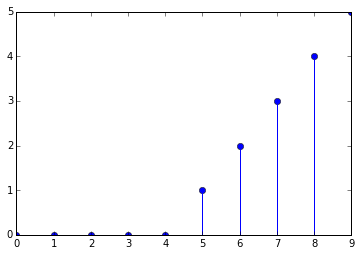

In [86]:
N=10
st = step(4,N)
print st
pr=prim(st,N)
print pr
plt.stem(pr)

# The primitive operator is unstable, being not bounded

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


<Container object of 3 artists>

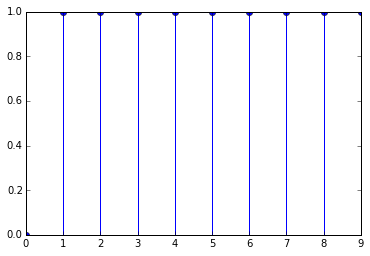

In [87]:
def dirac(n=0, N=20):
    if(n >= 0 & n < N):
       myDirac = np.zeros(N)
       myDirac[n] = 1 
    else :
        print('ERROR : n out of range')
    return myDirac

dirc = dirac(0,10)
print dirc
print prim(dirc,10)

plt.stem(prim(dirc,10))


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

In [ ]:
N=10
M = np.zeros(N)   

for i in np.arange(0,N):
    M[i]=


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


**3.2** Prove the system defined by the previous equation is linear (and invariant).

**3.3** Propose a nonlinear/noninvariant system.